In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, accuracy_score

# For the IRIS data set write down the meta information.

In [2]:
iris = pd.read_csv("Iris.csv")
iris = iris.iloc[:,1:6]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1. Title: Iris Plants Database

 

### 2. Sources:

      (a) Creator: R.A. Fisher

      (b) Donor: Michael Marshall (MARSHALL
      (c) Date: July, 1988

 

### 3. Past Usage:

    - Publications: too many to mention!!!  Here are a few.

    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"

       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions

       to Mathematical Statistics" (John Wiley, NY, 1950).

    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.

       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.

    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System

       Structure and Classification Rule for Recognition in Partially Exposed

       Environments".  IEEE Transactions on Pattern Analysis and Machine

       Intelligence, Vol. PAMI-2, No. 1, 67-71.

       -- Results:

          -- very low misclassification rates (0
    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 

       Transactions on Information Theory, May 1972, 431-433.

       -- Results:

          -- very low misclassification rates again

    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II

       conceptual clustering system finds 3 classes in the data.

 

### 4. Relevant Information:

    --- This is perhaps the best known database to be found in the pattern

        recognition literature.  Fisher's paper is a classic in the field

        and is referenced frequently to this day.  (See Duda & Hart, for

        example.)  The data set contains 3 classes of 50 instances each,

        where each class refers to a type of iris plant.  One class is

        linearly separable from the other 2; the latter are NOT linearly

        separable from each other.

    --- Predicted attribute: class of iris plant.

    --- This is an exceedingly simple domain.

 

### 5. Number of Instances: 150 (50 in each of three classes)

 

### 6. Number of Attributes: 4 numeric, predictive attributes and the class

 

### 7. Attribute Information:

    1. sepal length in cm

    2. sepal width in cm

    3. petal length in cm

    4. petal width in cm

    5. class: 

       -- Iris Setosa

       -- Iris Versicolour

       -- Iris Virginica

 

### 8. Missing Attribute Values: None

 

 Summary Statistics:

  	           Min  Max   Mean    SD   Class Correlation

    sepal length: 4.3  7.9   5.84  0.83    0.7826   

     sepal width: 2.0  4.4   3.05  0.43   -0.4194

    petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)

     petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

 

### 9. Class Distribution: 33.3

# Visualize the class label against the predictor variable using appropriate plots.

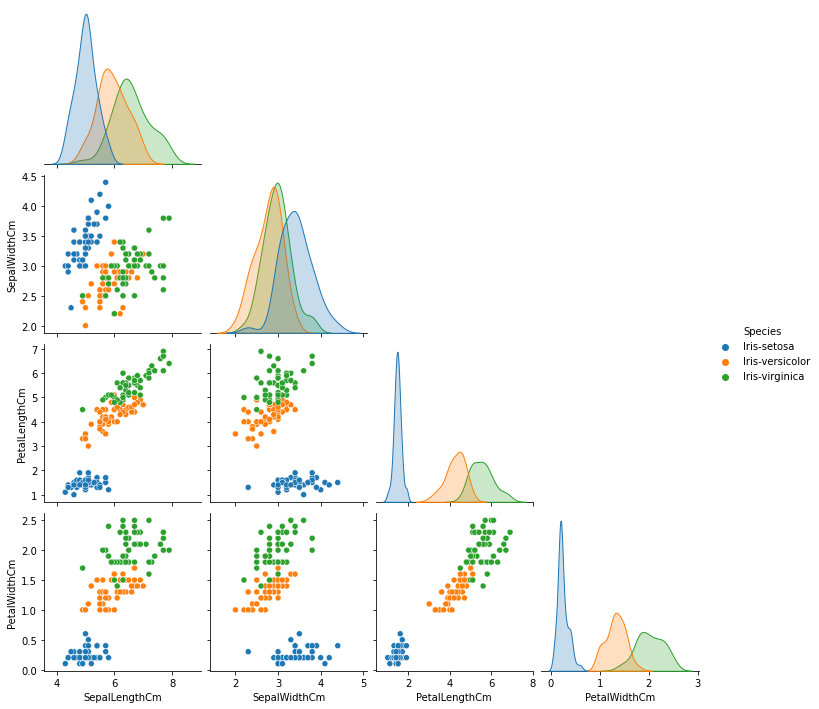

In [3]:
sns.pairplot(data = iris, hue = 'Species', kind = 'scatter', corner = True)

# Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [4]:
X = iris.iloc[:,0:4]
Y = iris.Species

X = np.array(X)
Y = np.array(Y)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

logreg = LogisticRegression(max_iter = 10000).fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print("Score = ", score)

Score =  0.9777777777777777


# Analysis and visualize the performance of the classifierusing metrics, confusion matrix.

In [6]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

<Figure size 720x360 with 0 Axes>

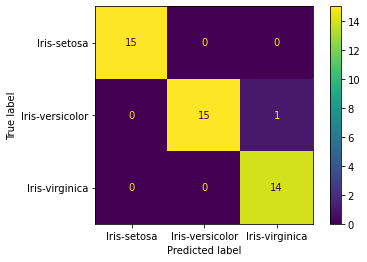

In [7]:
plt.figure(figsize = (10,5))
disp = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = logreg.classes_)
disp.plot()
plt.show()

In [8]:
tp_setosa = cf_matrix[0,0]
tp_versicolor = cf_matrix[1,1]
tp_virginica = cf_matrix[2,2]

tn_setosa = cf_matrix[1,1] + cf_matrix[1,2] + cf_matrix[2,1] + cf_matrix[2,2]
tn_versicolor = cf_matrix[0,1] + cf_matrix[0,2] + cf_matrix[2,1] + cf_matrix[2,2]
tn_virginica = cf_matrix[0,1] + cf_matrix[0,2] + cf_matrix[1,1] + cf_matrix[1,2]

fp_setosa = cf_matrix[0,1] + cf_matrix[0,2]
fp_versicolor = cf_matrix[1,0] + cf_matrix[1,2]
fp_virginica = cf_matrix[2,0] + cf_matrix[2,1]

fn_setosa = cf_matrix[1,0] + cf_matrix[2,0]
fn_versicolor = cf_matrix[0,1] + cf_matrix[2,1]
fn_virginica = cf_matrix[0,2] + cf_matrix[1,2]


tpr_setosa = tp_setosa/(tp_setosa + fn_setosa)
tnr_setosa = tn_setosa/(tn_setosa + fp_setosa)
acc_setosa = (tp_setosa + tn_setosa) / (tn_setosa + fp_setosa + fn_setosa + tp_setosa)

tpr_versicolor = tp_versicolor/(tp_versicolor + fn_versicolor)
tnr_versicolor = tn_versicolor/(tn_versicolor + fp_versicolor)
acc_versicolor = (tp_versicolor + tn_versicolor) / (tn_versicolor + fp_versicolor + fn_versicolor + tp_versicolor)

tpr_virginica = tp_virginica/(tp_virginica + fn_versicolor)
tnr_virginica = tn_virginica/(tn_virginica + fn_virginica)
acc_virginica = (tp_virginica + tn_virginica) / (tn_virginica + fp_virginica + fn_virginica + tp_virginica)

print("\t\tIris - Setosa\tIris - Versicolor\tIris - Virginica")
print("True Positive Rate\t{}\t{}\t{}".format(tpr_setosa, tpr_versicolor, tpr_virginica))
print("True Negative Rate\t{}\t{}\t{}".format(tnr_setosa, tnr_versicolor, tnr_virginica))
print("Accuracy\t\t{}\t{}\t{}".format(acc_setosa, acc_versicolor, acc_virginica))

		Iris - Setosa	Iris - Versicolor	Iris - Virginica
True Positive Rate	1.0	1.0	1.0
True Negative Rate	1.0	0.9333333333333333	0.9411764705882353
Accuracy		1.0	0.9666666666666667	0.967741935483871


In [9]:
tp = np.diag(cf_matrix)
fp = cf_matrix.sum(axis = 0) - tp
fn = cf_matrix.sum(axis = 1) - tp
tn = cf_matrix.sum() - (fp + fn + tp)

TPR = np.divide(tp,(tp+fn))
TNR = np.divide(tn,(tn+fn))
Accuracy = np.divide((tp+tn),(tp+fp+fn+tn))
print("\t\tIris - Setosa\tIris - Versicolor\tIris - Virginica")
print("True Positive Rate\t", TPR)
print("True Negative Rate\t", TNR)
print("Accuracy\t\t", Accuracy)

		Iris - Setosa	Iris - Versicolor	Iris - Virginica
True Positive Rate	 [1.     0.9375 1.    ]
True Negative Rate	 [1.         0.96666667 1.        ]
Accuracy		 [1.         0.97777778 0.97777778]


# Use the IRIS data  and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [10]:
knc = KNeighborsClassifier(n_neighbors = 11)
knc.fit(X_train, Y_train)
Y_pred = knc.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print("Score = ", score)

Score =  0.9777777777777777


# Identify the best k ( for k between 2 and 20) for the model built.

In [11]:
k_select = []
for k in range(3,19,2):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(X_train, Y_train)
    Y_pred = knc.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    if score > 0.95:
        k_select.append(k)
    print("Score for k : {} = {}".format(k,score))

Score for k : 3 = 0.9777777777777777
Score for k : 5 = 0.9777777777777777
Score for k : 7 = 0.9333333333333333
Score for k : 9 = 0.9777777777777777
Score for k : 11 = 0.9777777777777777
Score for k : 13 = 0.9555555555555556
Score for k : 15 = 0.9333333333333333
Score for k : 17 = 0.9333333333333333


In [13]:
print("Best Values of K : ", k_select)

N_samples = X.shape[0]

print("Square Root of N ({}) = {}".format(N_samples, N_samples**0.5))

Best Values of K :  [3, 5, 9, 11, 13]
Square Root of N (150) = 12.24744871391589


# Comment  on  the  classifier  (Logistic  Regression  or KNeighborsClassifier)  that  has  a  better performance for the IRIS dataset.

## Both the classifiers seem to have the same performance on the IRIS dataset